# Plotly experiments
20200929 mbr

In [2]:
# based on https://plotly.com/python/network-graphs/

import plotly.graph_objects as go
import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

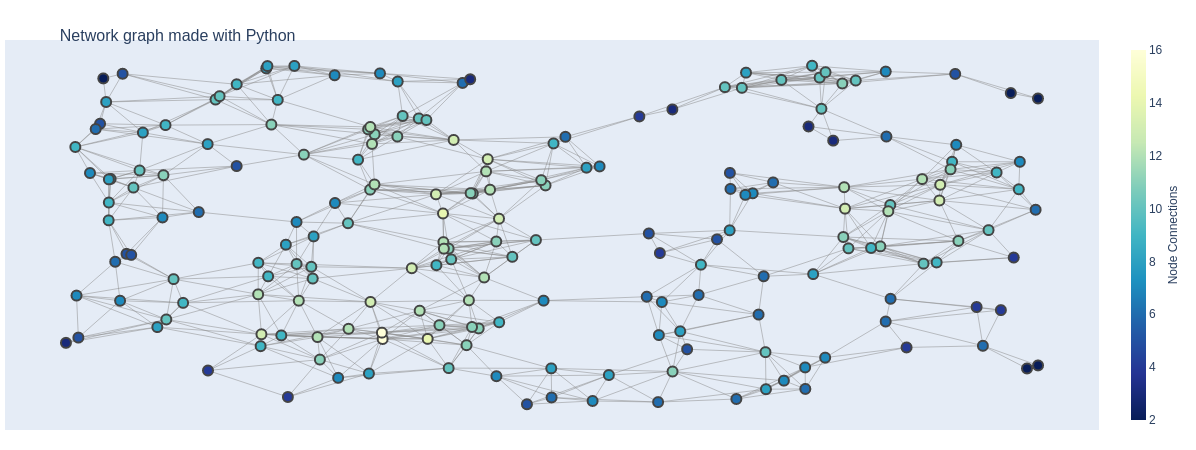

In [3]:
edgeX = []
edgeY = []
for e in G.edges():
    x0, y0 = G.nodes[e[0]]['pos']
    x1, y1 = G.nodes[e[1]]['pos']
    edgeX += [ x0, x1, None ]
    edgeY += [ y0, y1, None ]
edgeTrace = go.Scatter(x=edgeX, y=edgeY, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')
nodeX = []
nodeY = []
for n in G.nodes():
    x, y = G.nodes[n]['pos']
    nodeX.append(x)
    nodeY.append(y)
nodeTrace = go.Scatter(x=nodeX, y=nodeY, mode='markers', hoverinfo='text',\
                       marker=dict(showscale=True, colorscale='YlGnBu', reversescale=True, color=[], size=10,\
                                  colorbar=dict(thickness=15, title='Node Connections', xanchor='left', titleside='right'),\
                       line_width=2))
nodeAdjacencies = []
nodeText = []
for n, adj in enumerate(G.adjacency()):
    nodeAdjacencies.append(len(adj[1]))
    nodeText.append('# of connections: '+str(len(adj[1])))
nodeTrace.marker.color = nodeAdjacencies
nodeTrace.text = nodeText

fig = go.Figure(data=[edgeTrace, nodeTrace],\
               layout=go.Layout(\
                               title='<br>Network graph made with Python',
                               titlefont_size=16, showlegend=False, hovermode='closest',\
                               margin=dict(b=20, l=5, r=5, t=40),\
                               xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),\
                               yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.show()

In [4]:
import plotly.express as px
df = px.data.iris()

In [5]:
fig2 = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",\
                  marginal_x="box", trendline="ols", template="simple_white")

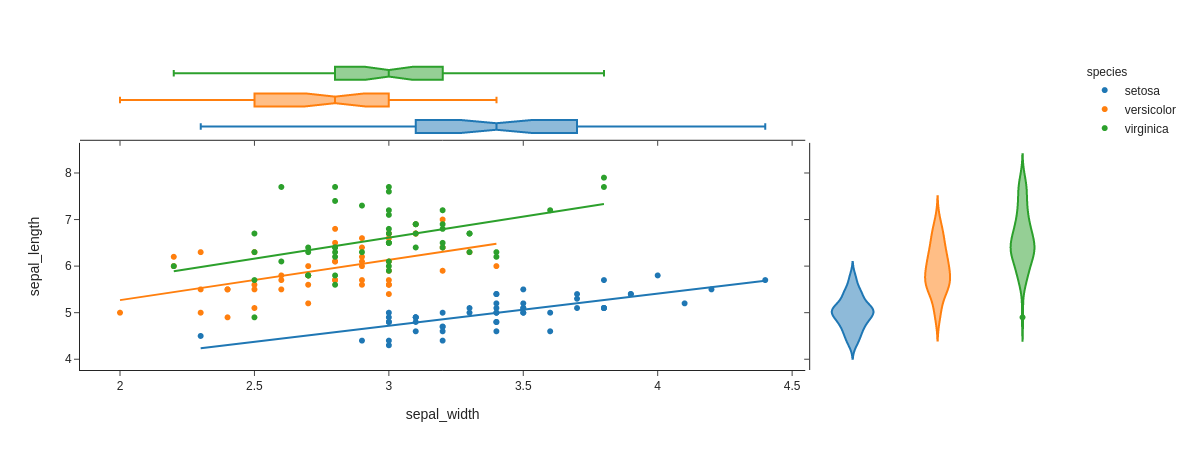

In [6]:
fig2.show()

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

sepal_length  sepal_width  petal_length  petal_width    species  \
0             5.1          3.5           1.4          0.2     setosa   
1             4.9          3.0           1.4          0.2     setosa   
2             4.7          3.2           1.3          0.2     setosa   
3             4.6          3.1           1.5          0.2     setosa   
4             5.0          3.6           1.4          0.2     setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     species_id  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

In [12]:
df2 = px.data.tips()

In [13]:
df2

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

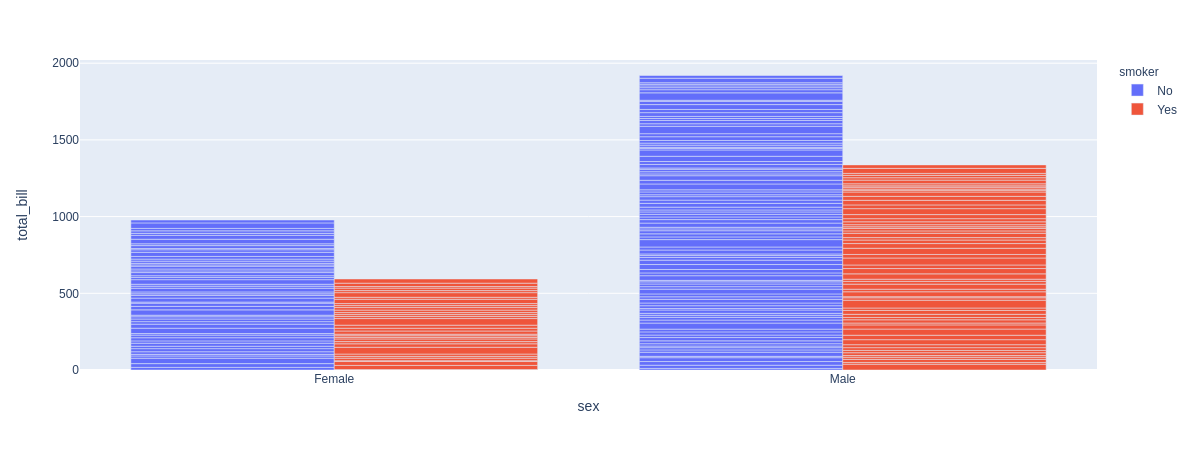

In [15]:
fig3 = px.bar(df2, x="sex", y="total_bill", color="smoker", barmode="group")
fig3.show()

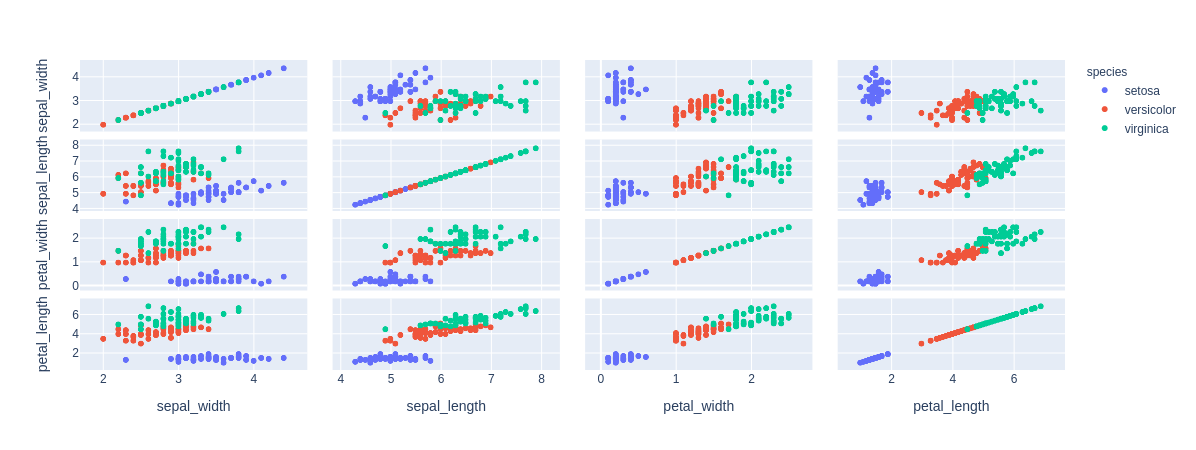

In [16]:
px.scatter_matrix(px.data.iris(), dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species").show()

In [17]:
px.data.gapminder()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623       ZWE   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298       ZWE   

      iso_num  
0           4  
1           4  
2           4  
3           4  
4           4  
...       ...  
1699      716  
1700      716  
1701      716  
1702      716  
1703      716  

[1704 rows x 8 columns]

In [18]:
type(px.data.gapminder())

pandas.core.frame.DataFrame

In [19]:
px.data.wind()

direction strength  frequency
0           N      0-1        0.5
1         NNE      0-1        0.6
2          NE      0-1        0.5
3         ENE      0-1        0.4
4           E      0-1        0.4
..        ...      ...        ...
123       WSW       6+        0.1
124         W       6+        0.9
125       WNW       6+        2.2
126        NW       6+        1.5
127       NNW       6+        0.2

[128 rows x 3 columns]

In [20]:
px.data.election()

district  Coderre  Bergeron  \
0                                  101-Bois-de-Liesse     2481      1829   
1                               102-Cap-Saint-Jacques     2525      1163   
2                                11-Sault-au-Récollet     3348      2770   
3                                        111-Mile-End     1734      4782   
4                                      112-DeLorimier     1770      5933   
5                                    113-Jeanne-Mance     1455      3599   
6                                    12-Saint-Sulpice     3252      2521   
7                          121-La Pointe-aux-Prairies     5456      1760   
8                             122-Pointe-aux-Trembles     4734      1879   
9                            123-Rivière-des-Prairies     5737       958   
10                                        13-Ahuntsic     2979      3430   
11                                  131-Saint-Édouard     1827      6408   
12                             132-Étienne-Desmarteau     2331      5748   
13                                 133-Vieux-Rosemont     2670      4962   
14                                 134-Marie-Victorin     3673      3155   
15                           14-Bordeaux-Cartierville     3612      1554   
16                                 141-Côte-de-Liesse     4308      1320   
17                                 142-Norman-McLaren     4104      1459   
18                              151-Saint-Léonard-Est     3931       882   
19                            152-Saint-Léonard-Ouest     5387      1184   
20  161-Saint-HenriPetite-BourgognePointe-Saint-Ch...     2432      3368   
21                                162-Saint-PaulÉmard     2566      2092   
22                      171-ChamplainL'Île-des-Soeurs     3347      2562   
23                           172-Desmarchais-Crawford     2476      2631   
24                                   181-Peter-McGill     1451       754   
25                                  182-Saint-Jacques     1906      2169   
26                                   183-Sainte-Marie     1347      2827   
27                                   191-Saint-Michel     3668       984   
28                              192-François-Perrault     2878      2666   
29                                       193-Villeray     2201      5819   
30                                 194-Parc-Extension     2420      1793   
31                                           21-Ouest     2184       691   
32                                             22-Est     1589       708   
33                                          23-Centre     2526       851   
34                                      31-Darlington     1873      1182   
35                                 32-Côte-des-Neiges     1644      1950   
36                                         33-Snowdon     1548      1503   
37                             34-Notre-Dame-de-Grâce     1773      2653   
38                                          35-Loyola     2040      1437   
39                                        41-du Canal     1165       832   
40                                42-J.-Émery-Provost     1193       653   
41                                    43-Fort-Rolland     1325      1205   
42                               51-Sault-Saint-Louis     4201      1642   
43                                 52-Cecil-P.-Newman     3536      1330   
44                                 61-Pierre-Foretier      631       258   
45                            62-Denis-Benjamin-Viger      595       226   
46                                  63-Jacques-Bizard      518       224   
47                                64-Sainte-Geneviève      332       131   
48                                  71-Tétreaultville     3694      2589   
49                        72-MaisonneuveLongue-Pointe     2746      3250   
50                                       73-Hochelaga     1546      3679   
51                                      74-Louis-Riel     3509      2178   
52               

In [7]:
import json
with open('../graph.json', 'r') as infile:
    entropies = json.loads(infile.read())

In [5]:
entropies['vertices'][:5]

[{'elements': 8,
  'entropy': 1.4952064752578735,
  'name': 'body.custodianAccSegregations.cas'},
 {'elements': 3,
  'entropy': 1.2681350708007812,
  'name': 'body.custodianSegregations.cs'},
 {'elements': 4,
  'entropy': 1.1067529916763306,
  'name': 'body.custodianTypes.ct'},
 {'elements': 10,
  'entropy': 2.3310229778289795,
  'name': 'body.customer.cifId.buId'},
 {'elements': 2583,
  'entropy': 10.038304328918457,
  'name': 'body.customer.cifId.cifNoInt'}]

In [8]:
import pandas as pd
import math

def log2(x):
    return math.log(x)/math.log(2.0)

In [9]:
entpd = pd.DataFrame([ [e['name'], e['elements'], log2(e['elements']), e['entropy']] for e in entropies['vertices'] ],\
                     columns=['name', 'elements', 'random', 'entropy'])

In [10]:
entpd[70:]

name  elements     random  \
70                              body.transaction.side         4   2.000000   
71  body.transaction.transactionOrder.orderAttrs.attr        11   3.459432   
72          body.transaction.transactionOrder.orderId      5247  12.357277   
73        body.transaction.transactionOrder.orderType        23   4.523562   
74                                 header.ClientImsId         2   1.000000   
75                                     header.channel         1   0.000000   
76                               header.clientJobName        62   5.954196   
77                             header.clientJobNumber       813   9.667112   
78                                  header.clientName        25   4.643856   
79                                header.clientSystem         2   1.000000   
80                                  header.clientType         3   1.584963   
81                               header.correlationId     13181  13.686172   
82                      header.correlationIdAggregate     13181  13.686172   
83                          header.monitoringPosition         1   0.000000   
84                               header.pathToService         1   0.000000   
85                                   header.timestamp     13174  13.685406   
86                             header.transactionName        14   3.807355   
87                                    header.userName        58   5.857981   
88                       body.segrCustodiansOut.scOut       593   9.211888   

      entropy  
70   0.182435  
71   1.833735  
72  12.220464  
73   1.827704  
74   0.825089  
75   0.000000  
76   2.717082  
77   5.061166  
78   2.182282  
79   0.825592  
80   0.500007  
81  13.688230  
82  13.688230  
83   0.000000  
84   0.000000  
85  13.687167  
86   2.359144  
87   1.265244  
88   5.218049

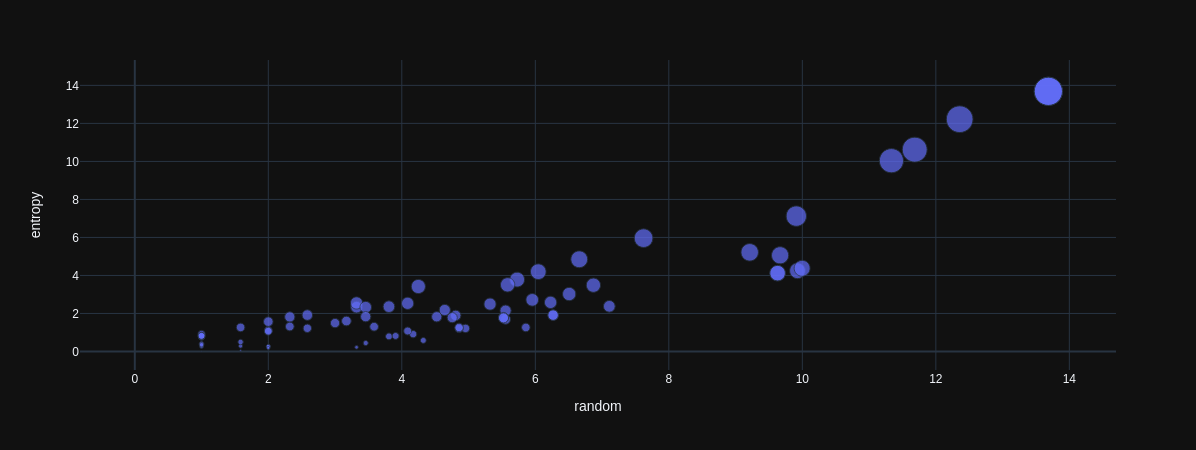

In [11]:
px.scatter(entpd, x='random', y='entropy', size='entropy', hover_name='name').update_layout(template='plotly_dark').show()

In [12]:
entropies['edges'][:2]

[{'A': 'body.custodianAccSegregations.cas',
  'B': 'body.custodianSegregations.cs',
  'infoAll': {'entropyA': 0.18701587617397308,
   'entropyAcondB': 0.15133333206176758,
   'entropyB': 1.2681350708007812,
   'entropyBcondA': 1.2324525117874146,
   'jointEntropy': 1.4194684028625488,
   'mutualInfo': 0.0356825590133667},
  'infoNonNull': {'entropyA': 1.4952064752578735,
   'entropyAcondB': 0.8975749015808105,
   'entropyB': 1.0428659915924072,
   'entropyBcondA': 0.44523441791534424,
   'jointEntropy': 1.9404408931732178,
   'mutualInfo': 0.5976316928863525}},
 {'A': 'body.custodianAccSegregations.cas',
  'B': 'body.custodianTypes.ct',
  'infoAll': {'entropyA': 0.18701587617397308,
   'entropyAcondB': 0.1732550859451294,
   'entropyB': 1.1067529916763306,
   'entropyBcondA': 1.0929921865463257,
   'jointEntropy': 1.28000807762146,
   'mutualInfo': 0.013760805130004883},
  'infoNonNull': {'entropyA': 1.4952064752578735,
   'entropyAcondB': 0.9485307931900024,
   'entropyB': 0.991910099

In [13]:
def NonNullEntropy(v):
    e = [ e for e in entropies['edges'] if e['A'] == v['name'] ]
    return e[0]['infoNonNull']['entropyA'] if len(e) > 0 else v['entropy']

entropiesX = entropies
for i in range(len(entropies['vertices'])):
    entropiesX['vertices'][i]['entropyNonNull'] = NonNullEntropy(entropies['vertices'][i])

In [14]:
def category(ent, entNonNull):
    if ent < 1.0e-5:
        return 'const'
    elif entNonNull < 1.0e-5:
        return 'flag'
    elif ent == entNonNull:
        return 'nonNull'
    else:
        return 'standard'

In [15]:
entpd = pd.DataFrame([ [e['name'], e['elements'], log2(e['elements']), e['entropy'], e['entropyNonNull'],\
                        1 if e['entropy']==e['entropyNonNull'] else 0 ] for e in entropiesX['vertices'] ],\
                     columns=['name', 'elements', 'random', 'entropy', 'entropyNonNull', 'isNonNull'])

In [16]:
entpd2 = pd.DataFrame([ [e['name'], e['elements'], log2(e['elements']), e['entropy'], e['entropyNonNull'], category(e['entropy'], e['entropyNonNull'])]\
                       for e in entropiesX['vertices'] ],\
                      columns=['name', 'elements', 'random', 'entropy', 'entropyNonNull', 'category'])

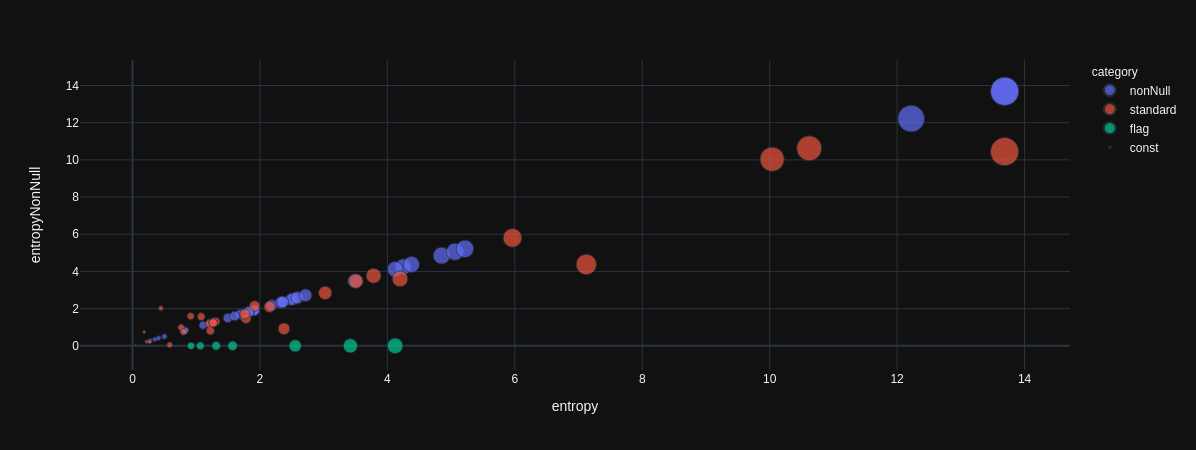

In [17]:
px.scatter(entpd2, x='entropy', y='entropyNonNull', size='entropy', color='category', hover_name='name').update_layout(template='plotly_dark').show()

In [18]:
[ e for e in entropies['vertices'] if e['name'] == 'body.financialInstrument.issuerIdGk' ]

[{'elements': 792,
  'entropy': 4.121816158294678,
  'name': 'body.financialInstrument.issuerIdGk',
  'entropyNonNull': 0.0}]

In [19]:
import networkx as nx

In [20]:
import json
with open('../graph.json', 'r') as infile:
    gdata = json.loads(infile.read())

In [21]:
eg = nx.DiGraph()

In [22]:
for v in gdata['vertices']:
    eg.add_node(v['name'], node_size=v['entropy'], label=v['name'])

In [23]:
def links(e, lst):
    return e['A'] in lst or e['B'] in lst

for e in gdata['edges']:
    if e['infoNonNull']['entropyBcondA'] < 1.0e-5 \
        and not links(e, ['header.correlationId', 'header.correlationIdAggregate', 'header.timestamp', 'header.channel',\
                          'header.monitoringPosition', 'header.pathToService']):
        eg.add_edge(e['A'], e['B'])
        
pos = nx.spring_layout(eg, iterations=1000)

In [24]:
len(pos)

89

In [25]:
import plotly.graph_objects as go

edgeX = []
edgeY = []
for e in eg.edges():
    x0, y0 = pos[e[0]]
    x1, y1 = pos[e[1]]
    edgeX += [ x0, x1, None ]
    edgeY += [ y0, y1, None ]

edgeTrace = go.Scatter(x=edgeX, y=edgeY, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

In [26]:
nodeX = [ p[0] for p in pos.values() ]
nodeY = [ p[1] for p in pos.values() ]
nodeTrace = go.Scatter(x=nodeX, y=nodeY, mode='markers', hoverinfo='text',\
                      text=[ v['name'] for v in gdata['vertices'] ],\
                      marker=dict(showscale=True, colorscale='YlGnBu', reversescale=True,\
                                  color=[ len(v[1]) for _, v in enumerate(eg.adjacency()) ],\
                                  size=[ e['entropy']*5.0 for e in gdata['vertices'] ],\
                                  colorbar=dict(thickness=15, title='Dependents', xanchor='left', titleside='right'),\
                      line_width=1))

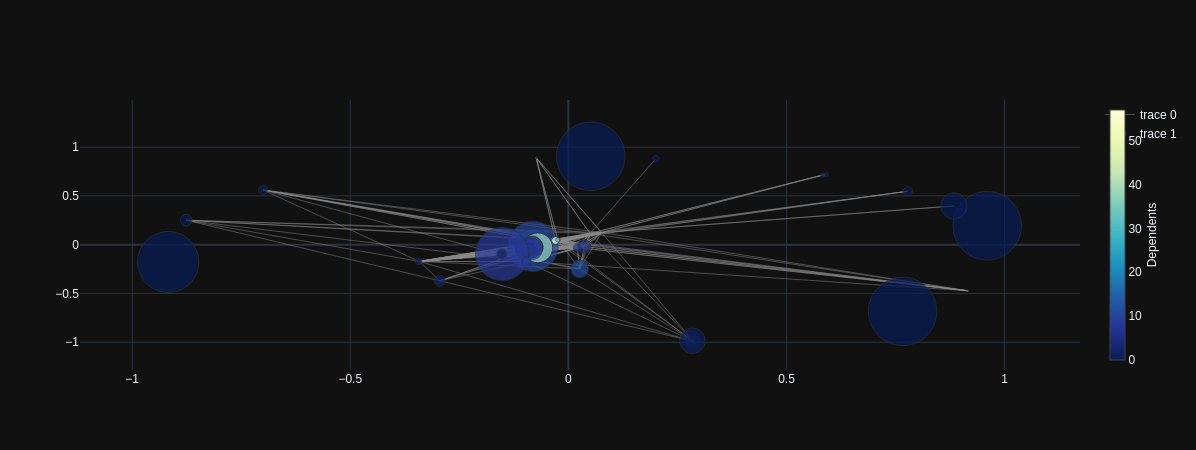

In [27]:
go.Figure(data=[edgeTrace, nodeTrace]).update_layout(template='plotly_dark').show()

In [28]:
posY = { n: 0 for n in eg.nodes() }
w0 = [ n for n in eg.nodes() ]
changed = True
while changed:
    w1 = []
    changed = False
    for n in w0:
        p0 = posY[n]
        for e in eg.edges():
            if e[0] == n:
                if posY[e[1]] < p0+1:
                    posY[e[1]] = p0+1
                    w1.append(e[1])
                    changed = True
    w0 = w1

In [30]:
posX = { v['name']: v['entropy'] for v in gdata['vertices'] }
edgeX = []
edgeY = []
for e in eg.edges():
    edgeX += [ posX[e[0]], posX[e[1]], None ]
    edgeY += [ posY[e[0]], posY[e[1]], None ]
    
edgeTrace = go.Scatter(x=edgeX, y=edgeY, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

In [31]:
nodeX = list(posX.values())
nodeY = list(posY.values())
nodeTrace = go.Scatter(x=nodeX, y=nodeY, mode='markers', hoverinfo='text',\
                      text=[ v['name'] for v in gdata['vertices'] ],\
                      marker=dict(showscale=True, colorscale='YlGnBu', reversescale=True,\
                                  color=[ len(v[1]) for _, v in enumerate(eg.adjacency()) ],\
                                  size=[ e['entropy']*5.0 for e in gdata['vertices'] ],\
                                  colorbar=dict(thickness=15, title='Dependents', xanchor='left', titleside='right'),\
                      line_width=1))

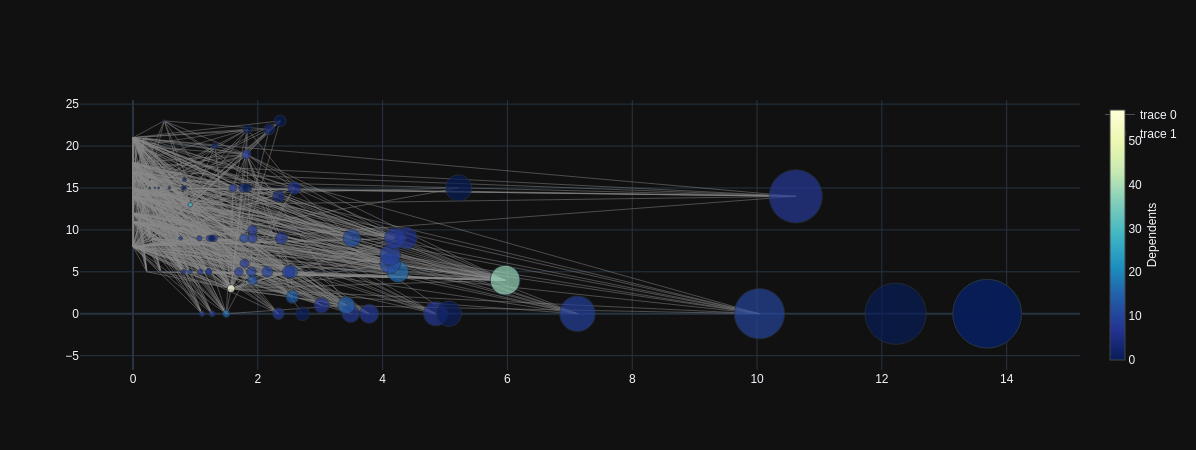

In [32]:
go.Figure(data=[edgeTrace, nodeTrace]).update_layout(template='plotly_dark').show()

In [156]:
adj = { t[0]: t[1] for f, t in enumerate(eg.adjacency()) }

In [157]:
len(adj)

89

In [47]:
gdata['edges'][-5:]

[{'A': 'header.timestamp',
  'B': 'header.userName',
  'infoAll': {'entropyA': 13.687167167663574,
   'entropyAcondB': 12.411243438720703,
   'entropyB': 1.2759240865707397,
   'entropyBcondA': 0.0,
   'jointEntropy': 13.687167167663574,
   'mutualInfo': 1.275923728942871},
  'infoNonNull': {'entropyA': 13.685235023498535,
   'entropyAcondB': 12.419990539550781,
   'entropyB': 1.2652442455291748,
   'entropyBcondA': 0.0,
   'jointEntropy': 13.685235023498535,
   'mutualInfo': 1.265244483947754}},
 {'A': 'header.timestamp',
  'B': 'body.segrCustodiansOut.scOut',
  'infoAll': {'entropyA': 13.687167167663574,
   'entropyAcondB': 8.448482513427734,
   'entropyB': 5.239140033721924,
   'entropyBcondA': 0.0004558563232421875,
   'jointEntropy': 13.687623023986816,
   'mutualInfo': 5.23868465423584},
  'infoNonNull': {'entropyA': 13.67525863647461,
   'entropyAcondB': 8.457666397094727,
   'entropyB': 5.218049049377441,
   'entropyBcondA': 0.00045680999755859375,
   'jointEntropy': 13.6757154

In [33]:
import math
math.pi

3.141592653589793

In [42]:
import math

eg = nx.DiGraph()

for v in gdata['vertices']:
    eg.add_node(v['name'], node_size=v['entropy'], label=v['name'])
    
for e in gdata['edges']:
    d = min(e['infoAll']['entropyA'], e['infoAll']['entropyB'])
    w = e['infoAll']['mutualInfo']/d if d != 0.0 else 0.0
    if e['infoAll']['jointEntropy'] < 13.0 and w > 0.4:
        eg.add_edge(e['A'], e['B'], weight=w*w-0.5)
        
step = 2.0*math.pi/len(gdata['vertices'])
initialPos = {}
for i in range(len(gdata['vertices'])):
    initialPos[gdata['vertices'][i]['name']] = (math.sin(i*step), math.cos(i*step))

#pos = nx.drawing.nx_agraph.graphviz_layout(eg, prog='circo')
pos = nx.spring_layout(eg, iterations=30, weight='weight', pos=initialPos)
#pos = nx.random_layout(eg)

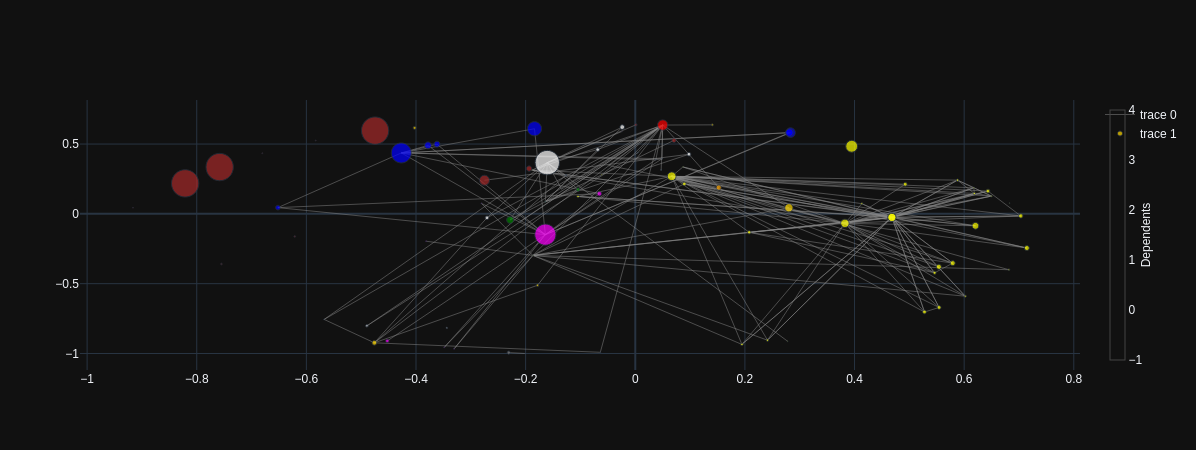

In [43]:
import plotly.graph_objects as go

def contains(e, name):
    return name in e[0] or name in e[1]

clusters = { 'customer': 'blue', 'financialInstrument': 'yellow', 'marketPlace': 'green', 'pset': 'grey',\
             'safekeepingAccount': 'magenta', 'scIn': 'orange', 'transaction': 'white', 'header': 'brown', 'scOut': 'red' }

def getCluster(v):
    for name, color in clusters.items():
        if name in v:
            return color
    return 'gold'

edgeX = []
edgeY = []
for e in eg.edges():
#    if nx.get_edge_attributes(e, 'weight') > 0.9:
    if eg.get_edge_data(e[0], e[1])['weight'] > 0.40 and contains(e, 'body'):
        x0, y0 = pos[e[0]]
        x1, y1 = pos[e[1]]
        edgeX += [ x0, x1, None ]
        edgeY += [ y0, y1, None ]

edgeTrace = go.Scatter(x=edgeX, y=edgeY, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

nodeX = [ p[0] for p in pos.values() ]
nodeY = [ p[1] for p in pos.values() ]
nodeTrace = go.Scatter(x=nodeX, y=nodeY, mode='markers', hoverinfo='text',\
                      text=[ v['name'] for v in gdata['vertices'] ],\
                      marker=dict(showscale=True, colorscale='YlGnBu', reversescale=True,\
                                  color=[ getCluster(v[0]) for _, v in enumerate(eg.adjacency()) ],\
#                                  color=[ len(v[1]) for _, v in enumerate(eg.adjacency()) ],\
                                  size=[ max(1.0, e['entropy']*2.0) for e in gdata['vertices'] ],\
                                  colorbar=dict(thickness=15, title='Dependents', xanchor='left', titleside='right'),\
                      line_width=1))

go.Figure(data=[edgeTrace, nodeTrace]).update_layout(template='plotly_dark').show()

In [178]:
len(eg.edges())

3674

In [38]:
def containsField(e, fname):
    return fname in e['A'] or fname in e['B']

def weight(e):
    d = min(e['infoAll']['entropyA'], e['infoAll']['entropyB'])
    return e['infoAll']['mutualInfo']/d if d != 0.0 else 0

[ (weight(e), e) for e in gdata['edges'] if containsField(e, 'valor') and containsField(e, 'financialInstrument') ]

[(0.6213527623730292,
  {'A': 'body.custodianAccSegregations.cas',
   'B': 'body.financialInstrument.valorId',
   'infoAll': {'entropyA': 0.18701587617397308,
    'entropyAcondB': 0.07081317901611328,
    'entropyB': 4.37856912612915,
    'entropyBcondA': 4.26236629486084,
    'jointEntropy': 4.449382305145264,
    'mutualInfo': 0.11620283126831055},
   'infoNonNull': {'entropyA': 1.4952064752578735,
    'entropyAcondB': 0.4125065803527832,
    'entropyB': 4.726298809051514,
    'entropyBcondA': 3.643599033355713,
    'jointEntropy': 5.138805389404297,
    'mutualInfo': 1.0826997756958008}}),
 (0.41353659673799914,
  {'A': 'body.custodianSegregations.cs',
   'B': 'body.financialInstrument.valorId',
   'infoAll': {'entropyA': 1.2681350708007812,
    'entropyAcondB': 0.7437148094177246,
    'entropyB': 4.37856912612915,
    'entropyBcondA': 3.8541488647460938,
    'jointEntropy': 5.122283935546875,
    'mutualInfo': 0.5244202613830566},
   'infoNonNull': {'entropyA': 1.2681350708007812,


In [44]:
gvert = { e['name']: e for e in gdata['vertices']}

In [48]:
def getJointInfo(a, b):
    return [ e for e in gdata['edges'] if a in e['A'] and b in e['B'] or b in e['A'] and a in e['B'] ]

In [50]:
getJointInfo('valorId', 'saNoInt')

[{'A': 'body.financialInstrument.valorId',
  'B': 'body.safekeepingAccount.account.saNoInt',
  'infoAll': {'entropyA': 4.37856912612915,
   'entropyAcondB': 1.0731964111328125,
   'entropyB': 10.62017822265625,
   'entropyBcondA': 7.314805507659912,
   'jointEntropy': 11.693374633789062,
   'mutualInfo': 3.3053722381591797},
  'infoNonNull': {'entropyA': 4.37856912612915,
   'entropyAcondB': 1.0731964111328125,
   'entropyB': 10.62017822265625,
   'entropyBcondA': 7.314805507659912,
   'jointEntropy': 11.693374633789062,
   'mutualInfo': 3.3053722381591797}}]

In [51]:
gvert['body.financialInstrument.valorId']

{'elements': 1022,
 'entropy': 4.37856912612915,
 'name': 'body.financialInstrument.valorId'}

In [168]:
adj

{'body.custodianAccSegregations.cas': {'body.financialInstrument.assetAllocationType': {},
  'body.financialInstrument.certificateType': {},
  'body.financialInstrument.jurisdictionTk': {},
  'body.financialInstrument.sixSisPositionType': {},
  'body.financialInstrument.tdfsValor': {},
  'body.marketPlace.marketPlaceId.institutionScheme': {},
  'body.pset.psetCountry.cdCs': {},
  'body.pset.psetCountry.cdIso': {},
  'body.pset.psetId.institutionScheme': {},
  'body.pset.psetId.institutionSymbol': {},
  'body.safekeepingAccount.tdfsDepositary': {},
  'body.segrCustodiansIn.scIn.custodian.type': {},
  'body.segrCustodiansIn.scIn.segregations.sgr.code': {},
  'body.segrCustodiansIn.scIn.segregations.sgr.scheme': {},
  'body.transaction.currency.cdIso': {},
  'body.transaction.participantType': {},
  'header.pathToService': {}},
 'body.custodianSegregations.cs': {'body.financialInstrument.jurisdictionTk': {},
  'body.financialInstrument.tdfsValor': {},
  'body.marketPlace.marketPlaceId.ins

In [68]:
import math

eg = nx.DiGraph()

selector = 'financialInstrument'

for v in gdata['vertices']:
    if selector in v['name']:
        eg.add_node(v['name'], node_size=v['entropy'], label=v['name'])
    
for e in gdata['edges']:
    if selector in e['A'] and selector in e['B']:
        d = min(e['infoAll']['entropyA'], e['infoAll']['entropyB'])
        w = e['infoAll']['mutualInfo']/d if d != 0.0 else 0.0
        eg.add_edge(e['A'], e['B'], weight=w*w-0.5)
        
step = 2.0*math.pi/len(gdata['vertices'])
initialPos = {}
for i in range(len(gdata['vertices'])):
    initialPos[gdata['vertices'][i]['name']] = (math.sin(i*step), math.cos(i*step))

# pos = nx.spring_layout(eg, iterations=30, weight='weight', pos=initialPos)
pos = nx.spring_layout(eg, iterations=30, weight='weight')

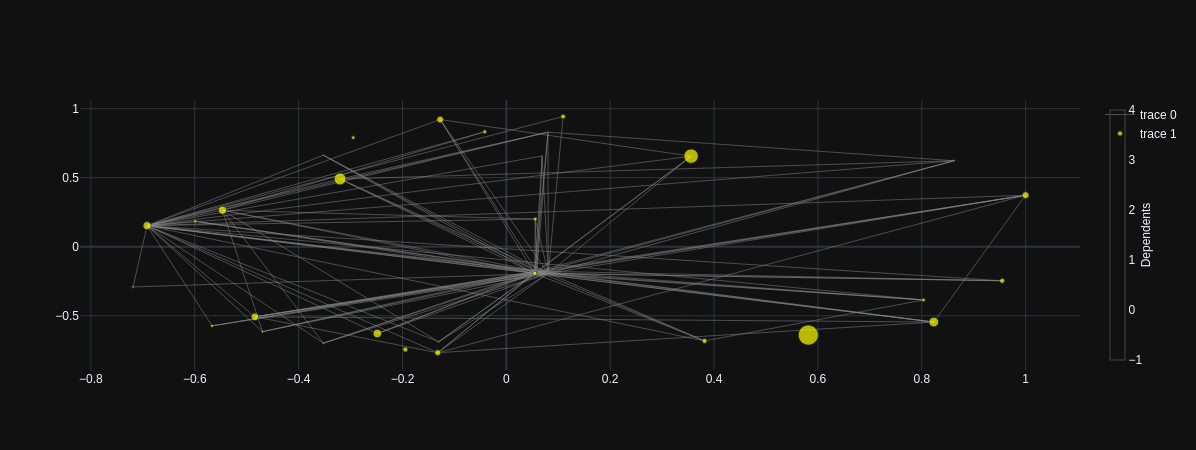

In [69]:
import plotly.graph_objects as go

def contains(e, name):
    return name in e[0] or name in e[1]

clusters = { 'customer': 'blue', 'financialInstrument': 'yellow', 'marketPlace': 'green', 'pset': 'grey',\
             'safekeepingAccount': 'magenta', 'scIn': 'orange', 'transaction': 'white', 'header': 'brown', 'scOut': 'red' }

def getCluster(v):
    for name, color in clusters.items():
        if name in v:
            return color
    return 'gold'

edgeX = []
edgeY = []
for e in eg.edges():
#    if nx.get_edge_attributes(e, 'weight') > 0.9:
    if eg.get_edge_data(e[0], e[1])['weight'] > 0.40 and contains(e, 'body'):
#        display('edge {0} - {1}'.format(e[0], e[1]))
        x0, y0 = pos[e[0]]
        x1, y1 = pos[e[1]]
        edgeX += [ x0, x1, None ]
        edgeY += [ y0, y1, None ]

edgeTrace = go.Scatter(x=edgeX, y=edgeY, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

nodeX = [ p[0] for p in pos.values() ]
nodeY = [ p[1] for p in pos.values() ]
nodeTrace = go.Scatter(x=nodeX, y=nodeY, mode='markers', hoverinfo='text',\
#                      text=[ v['name'] for v in gdata['vertices'] ],\
                      text=list(eg.nodes()),\
                      marker=dict(showscale=True, colorscale='YlGnBu', reversescale=True,\
                                  color=[ getCluster(v[0]) for _, v in enumerate(eg.adjacency()) ],\
#                                  color=[ len(v[1]) for _, v in enumerate(eg.adjacency()) ],\
                                  size=[ max(1.0, e['entropy']*2.0) for e in gdata['vertices'] ],\
                                  colorbar=dict(thickness=15, title='Dependents', xanchor='left', titleside='right'),\
                      line_width=1))

go.Figure(data=[edgeTrace, nodeTrace]).update_layout(template='plotly_dark').show()

In [63]:
eg.nodes()

NodeView(('body.financialInstrument.assetAllocationType', 'body.financialInstrument.borrowerCategory', 'body.financialInstrument.certificateType', 'body.financialInstrument.commissionCode', 'body.financialInstrument.csfiId', 'body.financialInstrument.custodyCapability.c', 'body.financialInstrument.custodyCapabilityBits', 'body.financialInstrument.custodyType.c', 'body.financialInstrument.custodyTypeBits', 'body.financialInstrument.deliveryCapability.c', 'body.financialInstrument.deliveryCapabilityBits', 'body.financialInstrument.fundDst', 'body.financialInstrument.fundType', 'body.financialInstrument.instrTypeCs', 'body.financialInstrument.instrTypeCsAdd.c', 'body.financialInstrument.instrTypeCsAddBits', 'body.financialInstrument.instrTypeTk', 'body.financialInstrument.instrTypeTkAdd', 'body.financialInstrument.isinId', 'body.financialInstrument.issuerDomicileCdCs', 'body.financialInstrument.issuerIdCsiid', 'body.financialInstrument.issuerIdGk', 'body.financialInstrument.jurisdictionTk

In [66]:
eg.edges()

OutEdgeView([('body.financialInstrument.assetAllocationType', 'body.financialInstrument.borrowerCategory'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.certificateType'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.commissionCode'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.csfiId'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.custodyCapability.c'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.custodyCapabilityBits'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.custodyType.c'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.custodyTypeBits'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.deliveryCapability.c'), ('body.financialInstrument.assetAllocationType', 'body.financialInstrument.deliveryCapabilityBits'), ('body.financialInstrument.assetAllo